In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df1=pd.read_csv("D:/DS ML&AI/Capstone3/env/Scripts/preProcessed.csv")
df1

,fare_amount,trip_duration,pickup_hour,tip_amount,trip_distance,tolls_amount,passenger_count,is_night,total_amount
0,9.0,7.916667,19,2.05,3.138096,0.00,1,0,12.35
1,11.0,11.100000,19,3.05,4.303331,0.00,1,0,15.35
2,54.5,31.100000,19,8.00,7.125038,0.00,2,0,63.80
3,31.5,0.000000,19,3.78,7.125038,5.54,3,0,41.62
4,98.0,0.000000,19,0.00,7.125038,15.50,5,0,113.80
...,...,...,...,...,...,...,...,...,...
211692,16.0,23.266667,7,3.36,3.806279,0.00,1,0,20.16
211693,15.5,22.750000,7,2.00,3.496576,0.00,1,0,18.30
211694,4.0,2.683333,7,0.00,0.580119,0.00,1,0,4.80
211695,7.0,7.150000,7,0.00,1.555737,0.00,2,0,7.80


<Axes: >

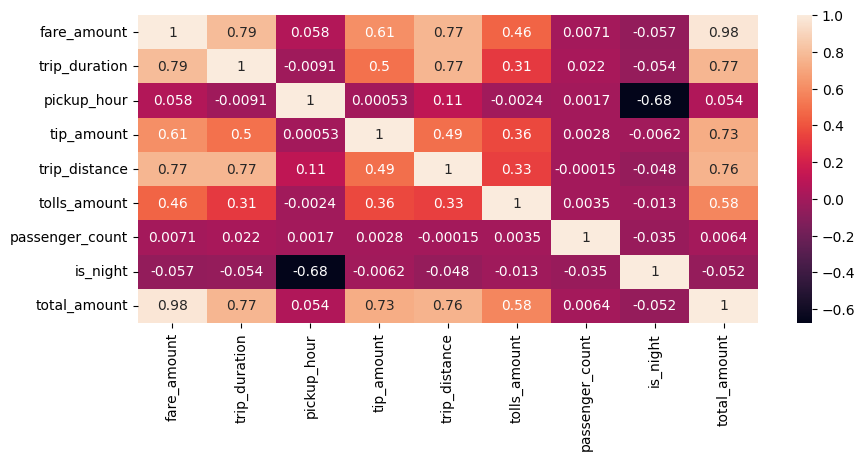

In [3]:
corr_matrix = df1.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,annot=True)

In [13]:
df1.dtypes

fare_amount        float64
trip_duration      float64
pickup_hour          int64
tip_amount         float64
trip_distance      float64
tolls_amount       float64
passenger_count      int64
is_night             int64
total_amount       float64
dtype: object

In [14]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211697 entries, 0 to 211696
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      211697 non-null  float64
 1   trip_duration    211697 non-null  float64
 2   pickup_hour      211697 non-null  int64  
 3   tip_amount       211697 non-null  float64
 4   trip_distance    211697 non-null  float64
 5   tolls_amount     211697 non-null  float64
 6   passenger_count  211697 non-null  int64  
 7   is_night         211697 non-null  int64  
 8   total_amount     211697 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 14.5 MB


In [9]:
df1.shape

(211697, 9)

In [4]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
X = df1.drop('total_amount',axis=1)
y = df1['total_amount']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "SGD Regressor":SGDRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }


results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,0.046508,0.008654,0.093025,0.999953
Decision Tree Regressor,0.045002,10.509169,3.241785,0.942874
Random Forest Regressor,0.037677,10.352714,3.217563,0.943725
XGBoost Regressor,0.195631,13.732911,3.705794,0.925350
SGD Regressor,0.059585,0.011024,0.104996,0.999940


In [10]:
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,0.046508,0.008654,0.093025,0.999953
Decision Tree Regressor,0.045002,10.509169,3.241785,0.942874
Random Forest Regressor,0.037677,10.352714,3.217563,0.943725
XGBoost Regressor,0.195631,13.732911,3.705794,0.925350
SGD Regressor,0.059585,0.011024,0.104996,0.999940


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score,KFold
import numpy as np

In [12]:
# Define the model
lr = SGDRegressor(fit_intercept=True)

# Define K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.99995519 0.99995204 0.99994516 0.99995227 0.99994389]

Mean R2 Score: 0.9999


In [13]:


# Define the model
lr = LinearRegression(fit_intercept=True)

# Define K-Fold Cross-Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Compare Mean and Standard Deviation
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.99995568 0.9999532  0.99995419 0.99995464 0.99995301]

Mean R2 Score: 1.0000


In [37]:
cv.get_n_splits

<bound method _BaseKFold.get_n_splits of KFold(n_splits=5, random_state=42, shuffle=True)>

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('lr',LinearRegression())])

In [22]:
pipe.fit(X_train,y_train)

,steps,"[('ss', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [23]:
pipe.score(X_test,y_test)

0.9999529601923954

In [24]:
import joblib

In [25]:
joblib.dump(pipe, 'linear_model.pkl')

['linear_model.pkl']

In [31]:
user_input = {
    "fare_amount": float(input("Enter fare amount: ")),
    "trip_duration": float(input("Enter trip duration Minutes: ")),
    "pickup_hour": int(input("Enter hour of the day: ")),
    "tip_amount": float(input("Enter tip amount: ")),
    "trip_distance": float(input("Enter trip distance: ")), 
    "tolls_amount": float(input("Enter tolls amount: ")),
    "passenger_count": int(input("Enter passenger count: ")),
    "is_night": int(input("Enter if 1 it is late hours: "))
}

data=pd.DataFrame([user_input])

load_model= joblib.load('linear_model.pkl')
total_fare_amount=load_model.predict(data)
print(f"total Fare for trip:{total_fare_amount[0]}")

Enter fare amount:  12
Enter trip duration Minutes:  20
Enter hour of the day:  11
Enter tip amount:  5
Enter trip distance:  15
Enter tolls amount:  10
Enter passenger count:  2
Enter if 1 it is late hours:  0


total Fare for trip:28.113273369369708


In [ ]:
load_model= joblib.load('linear_model.pkl')
total_fare_amount=load_model.predict(df)